# Title:> Predicting E-Commerce Shipping Status

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Loading Dataset
data=pd.read_csv("E:\Downloads Files\DD\Train.csv")
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [4]:
# checking the shape of data
data.shape

(10999, 12)

In [5]:
# information about the column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
# display the columns name
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [7]:
# checking the type of columns whether it is categoriacal or numerical
data.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [8]:
# the column which we are not going to use ,we can drop them
data=data.drop(["ID"],axis=1)

In [9]:
#Cheacking for null values
data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [10]:
#Data type Conversion
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
data.Warehouse_block =le.fit_transform(data.Warehouse_block )
data.Mode_of_Shipment=le.fit_transform(data.Mode_of_Shipment)
data.Product_importance=le.fit_transform(data.Product_importance)
data.Gender=le.fit_transform(data.Gender)
data["Reached.on.Time_Y.N"]=le.fit_transform(data["Reached.on.Time_Y.N"])   

In [12]:
data.rename(columns={"Reached.on.Time_Y.N" :"Reached_on_Time_Y_N"},inplace=True)

In [13]:
data.dtypes

Warehouse_block        int32
Mode_of_Shipment       int32
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int32
Gender                 int32
Discount_offered       int64
Weight_in_gms          int64
Reached_on_Time_Y_N    int64
dtype: object

# Model Fitting

# 1) Logistic Regression

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.metrics import confusion_matrix

In [15]:
x=data.iloc[: ,0:-1]
y=data.iloc[:,-1]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8799, 10), (2200, 10), (8799,), (2200,))

In [17]:
lg.fit(x_train,y_train)

LogisticRegression()

In [18]:
p1=lg.predict(x_test)
#p1

In [19]:
cf=confusion_matrix(p1,y_test)
cf

array([[532, 433],
       [357, 878]], dtype=int64)

In [20]:
ac1=cf.diagonal().sum()/cf.sum()*100
ac1

64.0909090909091

In [21]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [22]:
re1=recall_score(y_test,p1)
pr1=precision_score(y_test,p1)
f1=f1_score(y_test,p1)
print("\n",classification_report(y_test,p1))


               precision    recall  f1-score   support

           0       0.55      0.60      0.57       889
           1       0.71      0.67      0.69      1311

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.64      0.64      2200



# 2)Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
dt_p=dt.predict(x_test)
#dt_p

In [25]:
dt_c=confusion_matrix(dt_p,y_test)
dt_c

array([[479, 357],
       [410, 954]], dtype=int64)

In [26]:
dt_ac=dt_c.diagonal().sum()/dt_c.sum()*100
dt_ac

65.13636363636364

In [27]:
re2=recall_score(y_test,dt_p)
pr2=precision_score(y_test,dt_p)
f2=f1_score(y_test,dt_p)
print(classification_report(y_test,dt_p))

              precision    recall  f1-score   support

           0       0.57      0.54      0.56       889
           1       0.70      0.73      0.71      1311

    accuracy                           0.65      2200
   macro avg       0.64      0.63      0.63      2200
weighted avg       0.65      0.65      0.65      2200



# 3) Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
rf_p=rf.predict(x_test)

In [30]:
rf_c=confusion_matrix(rf_p,y_test)
rf_c

array([[629, 469],
       [260, 842]], dtype=int64)

In [31]:
rf_ac=rf_c.diagonal().sum()/rf_c.sum()*100
rf_ac

66.86363636363636

In [32]:
re3=recall_score(y_test,rf_p)
pr3=precision_score(y_test,rf_p)
f3=f1_score(y_test,rf_p)
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63      1098
           1       0.64      0.76      0.70      1102

    accuracy                           0.67      2200
   macro avg       0.67      0.67      0.67      2200
weighted avg       0.67      0.67      0.67      2200



# 4) K-Nereset Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
knn_p=knn.predict(x_test)

In [35]:
knn_c=confusion_matrix(knn_p,y_test)
knn_c

array([[531, 400],
       [358, 911]], dtype=int64)

In [36]:
knn_ac=knn_c.diagonal().sum()/knn_c.sum()*100
knn_ac

65.54545454545455

In [37]:
re4=recall_score(y_test,knn_p)
pr4=precision_score(y_test,knn_p)
f4=f1_score(y_test,knn_p)
print(classification_report(knn_p,y_test))

              precision    recall  f1-score   support

           0       0.60      0.57      0.58       931
           1       0.69      0.72      0.71      1269

    accuracy                           0.66      2200
   macro avg       0.65      0.64      0.64      2200
weighted avg       0.65      0.66      0.65      2200



# 5)XGB(XGBoost)

In [38]:
import xgboost
from xgboost import XGBClassifier

In [39]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
xgb_p=xgb.predict(x_test)
#xgb_p

In [41]:
xgb_c=confusion_matrix(y_test,xgb_p)
xgb_c

array([[568, 321],
       [441, 870]], dtype=int64)

In [42]:
xgb_ac=xgb_c.diagonal().sum()/xgb_c.sum()*100
xgb_ac

65.36363636363637

In [43]:
re5=recall_score(y_test,xgb_p)
pr5=precision_score(y_test,xgb_p)
f5=f1_score(y_test,xgb_p)
print(classification_report(y_test,xgb_p))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60       889
           1       0.73      0.66      0.70      1311

    accuracy                           0.65      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.65      0.66      2200



# 6)SUPPORT VECTOR MACHINE

In [44]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [45]:
s_p=svm.predict(x_test)

In [46]:
s_cf=confusion_matrix(y_test,s_p)
s_cf

array([[559, 330],
       [403, 908]], dtype=int64)

In [47]:
s_ac=s_cf.diagonal().sum()/s_cf.sum()*100
s_ac

66.68181818181819

In [48]:
re6=recall_score(y_test,s_p)
pr6=precision_score(y_test,s_p)
f6=f1_score(y_test,s_p)
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60       962
           1       0.69      0.73      0.71      1238

    accuracy                           0.67      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.66      0.67      0.67      2200



# 7)Naive Bayes

In [49]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [50]:
nb_p=nb.predict(x_test)

In [51]:
nb_c=confusion_matrix(y_test,nb_p)
nb_c

array([[681, 208],
       [521, 790]], dtype=int64)

In [52]:
nb_ac=nb_c.diagonal().sum()/nb_c.sum()*100
nb_ac

66.86363636363636

In [53]:
re7=recall_score(y_test,nb_p)
pr7=precision_score(y_test,nb_p)
f7=f1_score(y_test,nb_p)
print(classification_report(y_test,nb_p))

              precision    recall  f1-score   support

           0       0.57      0.77      0.65       889
           1       0.79      0.60      0.68      1311

    accuracy                           0.67      2200
   macro avg       0.68      0.68      0.67      2200
weighted avg       0.70      0.67      0.67      2200



# Basic Model Result

In [54]:
Model=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB(XGBoost)","SUPPORT VECTOR MACHINE","Naive Bayes"]
Accuracy=[ac1,dt_ac,rf_ac,knn_ac,xgb_ac,s_ac,nb_ac]
f1_score=[f1,f2,f3,f4,f5,f6,f7]
recall=[re1,re2,re3,re4,re5,re6,re7]
precision=[pr1,pr2,pr3,pr4,pr5,pr6,pr7]

In [55]:
DataFrame1=pd.DataFrame({"Model":Model,"Accuracy":Accuracy,"f1-score":f1_score,"recall":recall,"precision":precision})  
DataFrame1

,Model,Accuracy,f1-score,recall,precision
0,Logistic Regression,64.090909,0.689709,0.669718,0.710931
1,Decision Tree,65.136364,0.713271,0.727689,0.699413
2,Random Forest,66.863636,0.697886,0.642258,0.764065
3,KNN,65.545455,0.706202,0.694889,0.717888
4,XGB(XGBoost),65.363636,0.695444,0.663616,0.730479
5,SUPPORT VECTOR MACHINE,66.681818,0.712436,0.692601,0.733441
6,Naive Bayes,66.863636,0.684279,0.602593,0.791583


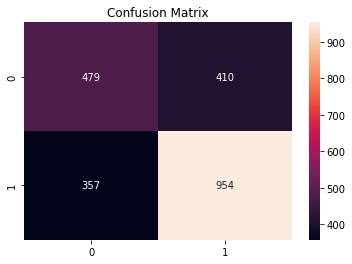

In [56]:
#Confusion matrix for Decision Tree model because the performance of model is good as compare to other model
cm=confusion_matrix(y_test,dt_p)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

From the above Confusion Matrix as the True negatives high as compare to true positive so we can conclude the result by using PRC curve

In [57]:
# Precision -recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
precision,recall,threshold=precision_recall_curve(y_test,dt_p)

Text(0.5, 1.0, 'PRC-CURVE')

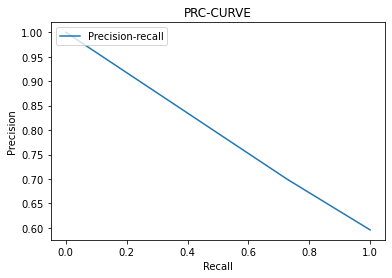

In [58]:
plt.plot(recall,precision,label="Precision-recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-CURVE")

Conclusion=
In general, the performance of all models is very low, but if it is necessary to choose the best model,if you have to pick a single model it should be SVM  because the accuracy,F1 score,Recall,precesion of model is good as compare to other model

# Class Imbalance

In [59]:
# 1)Random Oversampling

In [60]:
data.shape

(10999, 11)

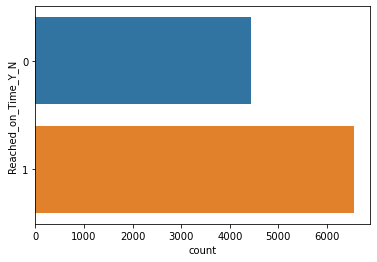

In [61]:
sns.countplot(data=data,y="Reached_on_Time_Y_N")
plt.show()

About 60% of orders are NOT delivered on time, and the other 40% are delivered as estimated

In [62]:
data["Reached_on_Time_Y_N"].value_counts()# 1 =Not Reached on Time ,0=reached on time

1    6563
0    4436
Name: Reached_on_Time_Y_N, dtype: int64

In [63]:
count_1,count_0=data["Reached_on_Time_Y_N"].value_counts()
count_1,count_0

(6563, 4436)

In [64]:
train_0=data[data["Reached_on_Time_Y_N"]==0]
train_0.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
3135,1,1,6,5,141,3,2,1,8,5031,0
3136,2,1,3,3,219,3,1,1,4,5956,0


In [65]:
train_1=data[data["Reached_on_Time_Y_N"]==1]
train_1.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1


In [66]:
train_0.shape,train_1.shape

((4436, 11), (6563, 11))

In [67]:
class_0_over=train_0.sample(count_1,replace=True)
class_0_over.shape,train_1.shape

((6563, 11), (6563, 11))

In [68]:
data1=pd.concat([class_0_over,train_1],axis=0)
data1.shape

(13126, 11)

In [69]:
data1["Reached_on_Time_Y_N"].value_counts()

0    6563
1    6563
Name: Reached_on_Time_Y_N, dtype: int64

In [70]:
#SMOTE
#x0=data.iloc[: ,0:-1]
#y0=data.iloc[:,-1]
#y0.shape
#from imblearn.over_sampling import SMOTE
#smote=SMOTE()
#x11,y11=smote.fit_resample(x0,y0)
#y11.value_counts()
#data1=pd.concat([x11,y11],axis=1)
#data1.shape

# outliers treatment

In [71]:
# Checking For Outliers

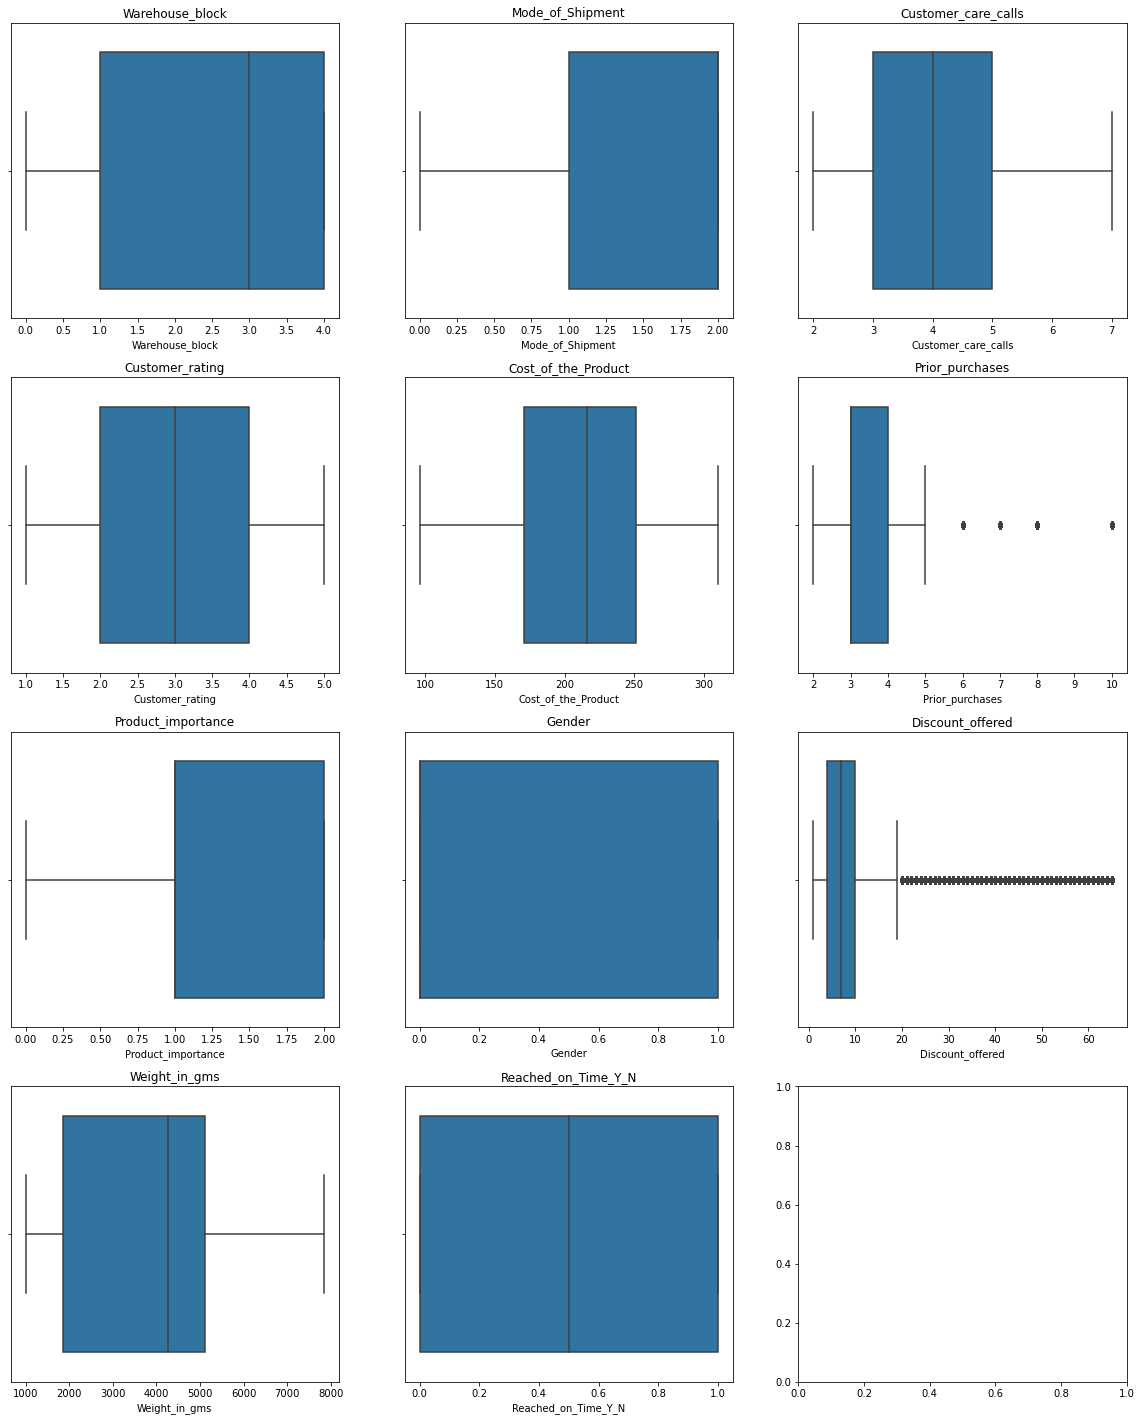

In [72]:
num_cols=data1.columns
fig,ax=plt.subplots(4,3,figsize=(20,25))
index=0
ax=ax.flatten()
for i in data1:
        sns.boxplot(data1[i],ax=ax[index])
        ax[index].set_title(i)
        index+=1
plt.show()

From The above box plot it is observe that outliers are present in Discount offered and prior purches column

In [73]:
# To check which column is numerical and which column is categorical 
#1)Warehouse_block
data1.Warehouse_block.value_counts()

4    4408
2    2205
3    2199
0    2188
1    2126
Name: Warehouse_block, dtype: int64

In [74]:
#2)Mode_of_Shipment
data1.Mode_of_Shipment.value_counts()

2    8934
0    2117
1    2075
Name: Mode_of_Shipment, dtype: int64

In [75]:
#3)Customer_care_calls
data1.Customer_care_calls.value_counts()

4    4219
3    3770
5    2806
6    1283
2     757
7     291
Name: Customer_care_calls, dtype: int64

In [76]:
data1.Customer_care_calls.describe()

count    13126.000000
mean         4.073213
std          1.147574
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: Customer_care_calls, dtype: float64

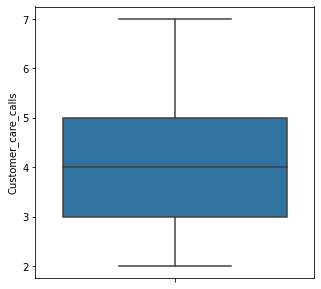

In [77]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=data1,y="Customer_care_calls")
plt.show()

In [78]:
#4)Customer_rating
data1.Customer_rating.value_counts()

3    2721
1    2685
2    2604
4    2602
5    2514
Name: Customer_rating, dtype: int64

In [79]:
#5)Cost_of_the_Product
data1.Cost_of_the_Product.value_counts()

257    143
245    142
260    133
258    132
243    127
      ... 
107      6
303      5
122      5
96       5
299      4
Name: Cost_of_the_Product, Length: 215, dtype: int64

<AxesSubplot:ylabel='Cost_of_the_Product'>

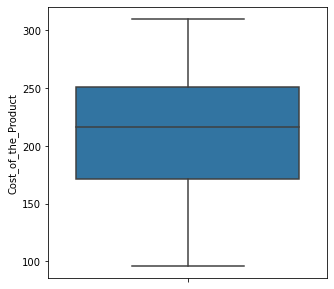

In [80]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=data1,y="Cost_of_the_Product")

No outliers present in this column

In [81]:
#6)Product_importance
data1.Product_importance.value_counts()

1    6338
2    5736
0    1052
Name: Product_importance, dtype: int64

In [82]:
#7)Prior_purchases
data1.Prior_purchases.value_counts()

3     4617
2     3101
4     2635
5     1633
6      665
10     187
7      152
8      136
Name: Prior_purchases, dtype: int64

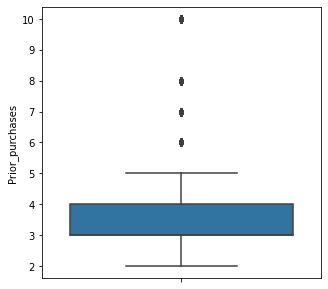

In [83]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=data1,y="Prior_purchases")
plt.show()

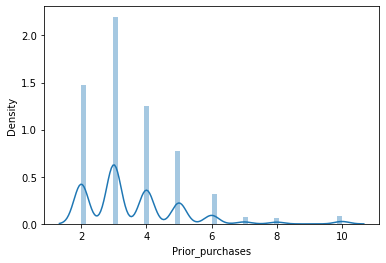

In [84]:
sns.distplot(data1.Prior_purchases) # Skewed data
plt.show()

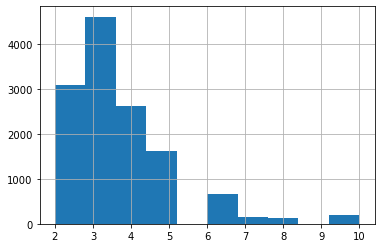

In [85]:
data1.Prior_purchases.hist()
plt.show()

In [86]:
data1.Prior_purchases.skew()

1.6155832707495419

In [87]:
IQR=data1.Prior_purchases.quantile(0.75)-data1.Prior_purchases.quantile(0.25)
IQR 

1.0

In [88]:
ub1=data1.Prior_purchases.quantile(0.75)+1.5*IQR  
lb1=data1.Prior_purchases.quantile(0.25)-1.5*IQR
print(ub1,lb1)

5.5 1.5


In [89]:
data1.loc[data1["Prior_purchases"]>5.5,"Prior_purchases"]=5.5

In [90]:
data1.Prior_purchases.skew() 

0.3870437333224334

after treating with outlier we got the skewness is 0.3940

In [91]:
#8)Gender
data1.Gender.value_counts()

0    6621
1    6505
Name: Gender, dtype: int64

In [92]:
#9).Discount_offered
data1.Discount_offered.value_counts() 

3     1128
10    1080
9     1071
4     1049
6     1045
      ... 
26      36
65      36
42      35
25      34
30      34
Name: Discount_offered, Length: 65, dtype: int64

In [93]:
data1.Discount_offered.describe()

count    13126.000000
mean        12.108563
std         15.153916
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64

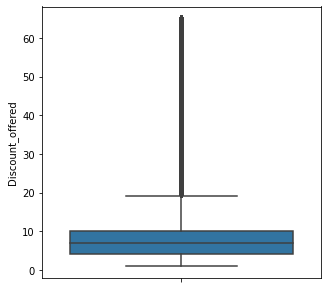

In [94]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=data1,y="Discount_offered")
plt.show()

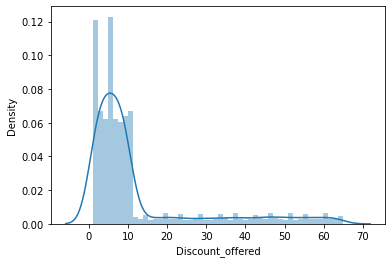

In [95]:
sns.distplot(data1.Discount_offered)
plt.show()

<AxesSubplot:>

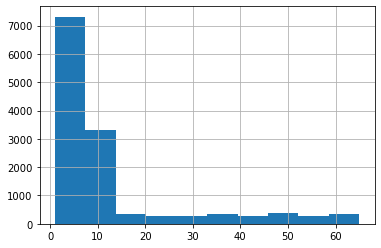

In [96]:
data1.Discount_offered.hist()

In [97]:
data1.Discount_offered.skew()

2.0634871262787784

In [98]:
IQR2=data1.Discount_offered.quantile(0.75)-data1.Discount_offered.quantile(0.25)
IQR2

6.0

In [99]:
ub2=data1.Discount_offered.quantile(0.75)+1.5*IQR2  #upper boundary formula  with 1.5 SD
lb2=data1.Discount_offered.quantile(0.25)-1.5*IQR2
print(ub2,lb2)

19.0 -5.0


In [100]:
data1.loc[data1["Discount_offered"]>19.0 ,"Discount_offered"]=19.0

In [101]:
data1.Discount_offered.skew()

0.8618714742138764

In [102]:
#10)Weight_in_gms
data1.Weight_in_gms.value_counts()

5724    22
4883    18
5211    17
5398    14
5021    14
        ..
3605     1
2128     1
2383     1
2072     1
1649     1
Name: Weight_in_gms, Length: 3964, dtype: int64

In [103]:
data1.Weight_in_gms.describe()

count    13126.000000
mean      3719.440957
std       1642.001047
min       1001.000000
25%       1860.250000
50%       4257.000000
75%       5118.000000
max       7846.000000
Name: Weight_in_gms, dtype: float64

<AxesSubplot:ylabel='Weight_in_gms'>

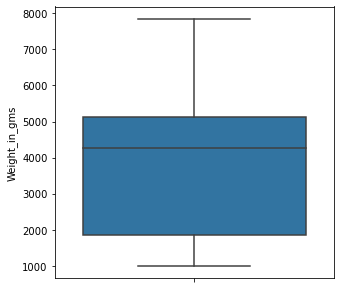

In [104]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=data1,y="Weight_in_gms")

No outliers present in .Weight_in_gms column

# Skewness Treatment

In [105]:
data1.skew()

Warehouse_block       -0.294011
Mode_of_Shipment      -1.183607
Customer_care_calls    0.368057
Customer_rating        0.018425
Cost_of_the_Product   -0.181954
Prior_purchases        0.387044
Product_importance    -0.435161
Gender                 0.017678
Discount_offered       0.861871
Weight_in_gms         -0.338277
Reached_on_Time_Y_N    0.000000
dtype: float64

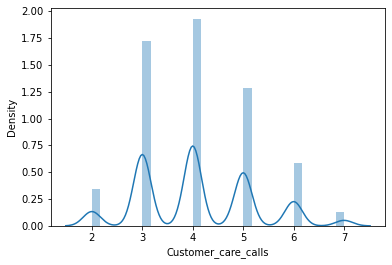

In [106]:
sns.distplot(data1.Customer_care_calls) 
plt.show()

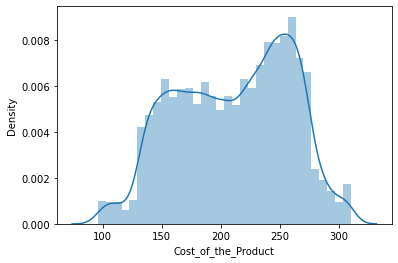

In [107]:
sns.distplot(data1.Cost_of_the_Product) 
plt.show()

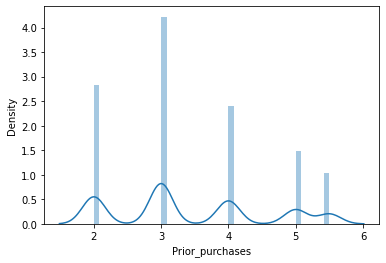

In [108]:
sns.distplot(data1.Prior_purchases) 
plt.show()

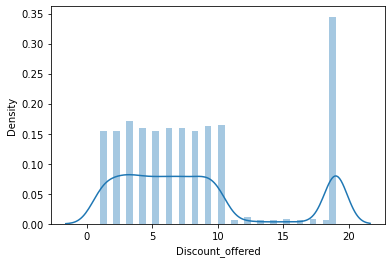

In [109]:
sns.distplot(data1.Discount_offered )
plt.show()

In [110]:
data1["Discount_offered"]=np.sqrt(data1["Discount_offered"])
data1["Weight_in_gms"]=np.sqrt(data1["Weight_in_gms"])

In [111]:
data1.skew()

Warehouse_block       -0.294011
Mode_of_Shipment      -1.183607
Customer_care_calls    0.368057
Customer_rating        0.018425
Cost_of_the_Product   -0.181954
Prior_purchases        0.387044
Product_importance    -0.435161
Gender                 0.017678
Discount_offered       0.295826
Weight_in_gms         -0.516636
Reached_on_Time_Y_N    0.000000
dtype: float64

After skewness Treatment we got the result as above

# Visualization

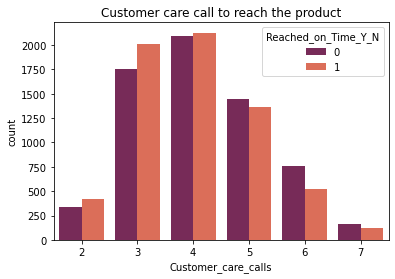

In [112]:
# count plot
sns.countplot(x='Customer_care_calls',hue='Reached_on_Time_Y_N',data=data1,palette='rocket')
plt.title("Customer care call to reach the product")
plt.show()

we can see there are more than 2000 instances where the customer has to call 4 times in order get the package delivered

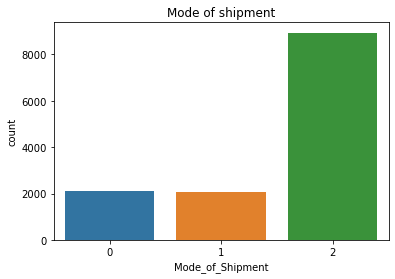

In [113]:
# CountPlot
sns.countplot(x ="Mode_of_Shipment",data =data1)
data1["Mode_of_Shipment"].value_counts()
plt.title("Mode of shipment")
plt.show()
#0:Flight,1:Road,2:Ship

Maximum number of transformation has done by ship as compare to other

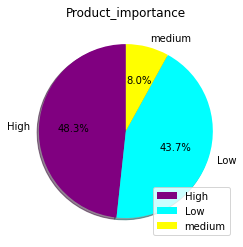

In [114]:
# Pie Chart
Product_importance = data1["Product_importance"].value_counts()
fig,ax = plt.subplots()
label=["High","Low","medium"]
color=["purple","cyan","yellow"]
ax.pie(Product_importance,labels=label,colors=color,autopct='%1.1f%%',shadow=True, startangle=90)
ax.set(aspect="equal", title='Product_importance')
plt.legend(loc="lower right")
fig.show()

From the above graph we observe that About 48.3% of the orders are of high priority and the rest is made up of 43.7% low priorty and the other ~8% is medium priority

In [115]:
v=data1.corr()
v

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
Warehouse_block,1.000000,-0.002489,0.013568,0.011525,0.002348,-0.004164,-0.000529,-0.010383,0.005328,0.006624,-0.002709
Mode_of_Shipment,-0.002489,1.000000,-0.020985,-0.005106,0.007983,-0.006054,0.002155,-0.012767,-0.004127,-0.000683,-0.003726
Customer_care_calls,0.013568,-0.020985,1.000000,-0.005417,0.329033,0.263423,0.001390,0.006606,-0.109811,-0.312103,-0.071237
Customer_rating,0.011525,-0.005106,-0.005417,1.000000,-0.002724,-0.001592,-0.005744,-0.000273,0.004704,0.005594,0.022738
Cost_of_the_Product,0.002348,0.007983,0.329033,-0.002724,1.000000,0.185262,0.009084,0.021593,-0.124210,-0.174018,-0.074937
Prior_purchases,-0.004164,-0.006054,0.263423,-0.001592,0.185262,1.000000,0.010875,-0.007511,-0.096676,-0.304709,-0.069366
Product_importance,-0.000529,0.002155,0.001390,-0.005744,0.009084,0.010875,1.000000,-0.011057,-0.007581,0.004840,-0.036851
Gender,-0.010383,-0.012767,0.006606,-0.000273,0.021593,-0.007511,-0.011057,1.000000,-0.010436,-0.007374,0.004419
Discount_offered,0.005328,-0.004127,-0.109811,0.004704,-0.124210,-0.096676,-0.007581,-0.010436,1.000000,-0.302217,0.393702
Weight_in_gms,0.006624,-0.000683,-0.312103,0.005594,-0.174018,-0.304709,0.004840,-0.007374,-0.302217,1.000000,-0.256018


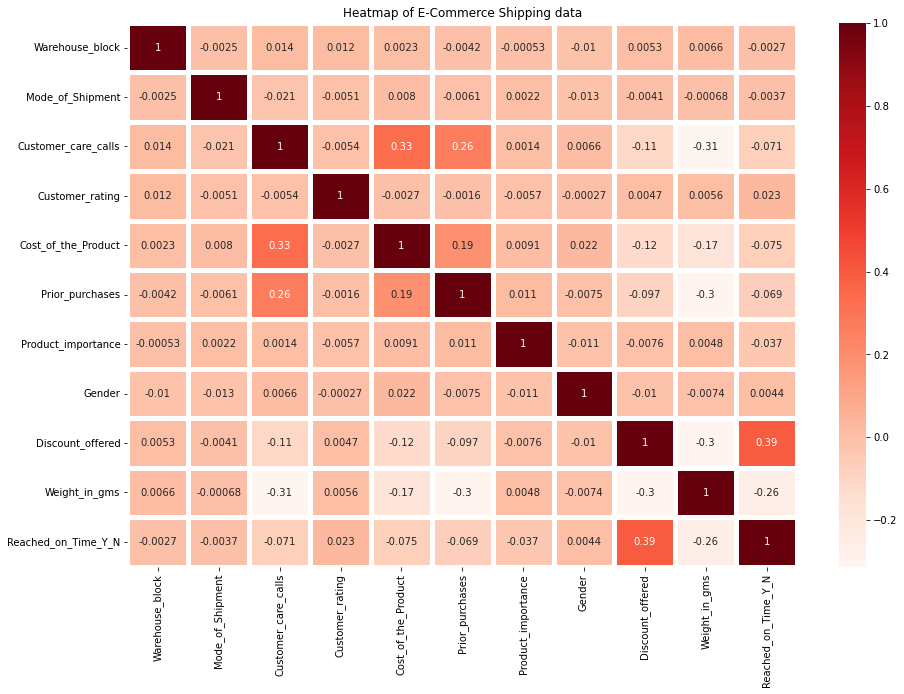

In [116]:
# Heat Map
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(v,linewidth=5,annot=True,cmap=plt.cm.Reds)
plt.title("Heatmap of E-Commerce Shipping data")
plt.show()

From the above heat map it is observe that there is a correlation between whether the product is reached on time or not and discount offered which is the low correlation The product discount is the feature that most highly correlates to if a product is delivered on time



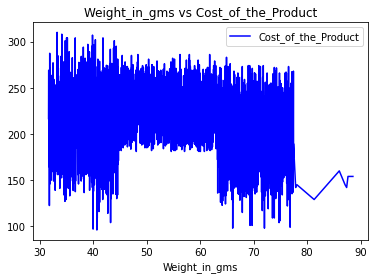

In [117]:
# Line Chart
a= data1.pivot_table(index="Weight_in_gms",values="Cost_of_the_Product",aggfunc="mean")
a.plot(color='blue',title = "Weight_in_gms vs Cost_of_the_Product")
plt.show()

From the above graph we can not say that as weight of the product increases cost of the product is also increases. in some cases weight of the product is high but cost is low

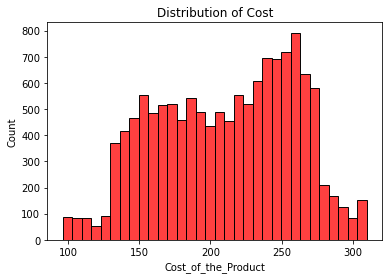

In [118]:
# Histogram
sns.histplot(data1.Cost_of_the_Product,color="red")
plt.title(f'Distribution of Cost')
plt.show()

Most orders cost between 150-250 rs

# Base Model 2

# 1)Logistic Regression

In [119]:
x1=data1.iloc[: ,0:-1]
y1=data1.iloc[:,-1]

In [120]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2,random_state=101)
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((10500, 10), (2626, 10), (10500,), (2626,))

In [121]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
lg1=LogisticRegression()

In [122]:
lg1.fit(x_train1,y_train1)

LogisticRegression()

In [123]:
lg_p2=lg1.predict(x_test1)

In [124]:
cf_2=confusion_matrix(lg_p2,y_test1)
cf_2

array([[967, 537],
       [359, 763]], dtype=int64)

In [125]:
lg_ac2=cf_2.diagonal().sum()/cf_2.sum()*100
lg_ac2

65.87966488956589

In [126]:
re_21=recall_score(y_test1,lg_p2)
pr_21=precision_score(y_test1,lg_p2)
f21=f1_score(y_test1,lg_p2,average="weighted")
print(classification_report(lg_p2,y_test1)) 

              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1504
           1       0.59      0.68      0.63      1122

    accuracy                           0.66      2626
   macro avg       0.66      0.66      0.66      2626
weighted avg       0.67      0.66      0.66      2626



# 2) Decision Tree

In [127]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()

In [128]:
dt1.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [129]:
dt_p2=dt1.predict(x_test1)
#dt_p2

In [130]:
dt_c2=confusion_matrix(dt_p2,y_test1)
dt_c2

array([[1130,  349],
       [ 196,  951]], dtype=int64)

In [131]:
dt_ac2=dt_c2.diagonal().sum()/dt_c2.sum()*100
dt_ac2

79.24600152322925

In [132]:
re_22=recall_score(y_test1,dt_p2)
pr_22=precision_score(y_test1,dt_p2)
f22=f1_score(y_test1,dt_p2,average="weighted")
print(classification_report(dt_p2,y_test1))

              precision    recall  f1-score   support

           0       0.85      0.76      0.81      1479
           1       0.73      0.83      0.78      1147

    accuracy                           0.79      2626
   macro avg       0.79      0.80      0.79      2626
weighted avg       0.80      0.79      0.79      2626



# 3)Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier()
rf2.fit(x_train1,y_train1)

RandomForestClassifier()

In [134]:
rf_p2=rf2.predict(x_test1)

In [135]:
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier()
rf2.fit(x_train1,y_train1)

RandomForestClassifier()

In [136]:
rf_p2=rf2.predict(x_test1)

In [137]:
rf_c2=confusion_matrix(rf_p2,y_test1)
rf_c2

array([[1198,  478],
       [ 128,  822]], dtype=int64)

In [138]:
rf_ac2=rf_c2.diagonal().sum()/rf_c2.sum()*100
rf_ac2

76.92307692307693

In [139]:
re_23=recall_score(y_test1,rf_p2)
pr_23=precision_score(y_test1,rf_p2)
f23=f1_score(rf_p2,y_test1,average="weighted")
print(classification_report(rf_p2,y_test1))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1676
           1       0.63      0.87      0.73       950

    accuracy                           0.77      2626
   macro avg       0.77      0.79      0.76      2626
weighted avg       0.81      0.77      0.77      2626



# 4) K-Nearset Neighbourhood

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier()
knn1.fit(x_train1,y_train1)

KNeighborsClassifier()

In [141]:
knn_p2=knn1.predict(x_test1)

In [142]:
knn_c2=confusion_matrix(knn_p2,y_test1)
knn_c2

array([[1091,  484],
       [ 235,  816]], dtype=int64)

In [143]:
knn_ac2=knn_c2.diagonal().sum()/knn_c2.sum()*100
knn_ac2

72.61995430312263

In [144]:
re_24=recall_score(y_test1,knn_p2)
pr_24=precision_score(y_test1,knn_p2)
f24=f1_score(knn_p2,y_test1,average="weighted")
print(classification_report(knn_p2,y_test1))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1575
           1       0.63      0.78      0.69      1051

    accuracy                           0.73      2626
   macro avg       0.73      0.73      0.72      2626
weighted avg       0.74      0.73      0.73      2626



# 5) XGB(XGBoost)

In [145]:
import xgboost
from xgboost import XGBClassifier

In [146]:
xgb1=XGBClassifier()

In [147]:
xgb1.fit(x_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [148]:
xgb_p2=xgb1.predict(x_test1)
#xgb_p2

In [149]:
xgb_c2=confusion_matrix(xgb_p2,y_test1)
xgb_c2

array([[1186,  472],
       [ 140,  828]], dtype=int64)

In [150]:
xgb_ac2=xgb_c2.diagonal().sum()/xgb_c2.sum()*100
xgb_ac2

76.6945925361767

In [151]:
re_25=recall_score(y_test1,xgb_p2)
pr_25=precision_score(y_test1,xgb_p2)
f25=f1_score(xgb_p2,y_test1,average="weighted")
print(classification_report(xgb_p2,y_test1))

              precision    recall  f1-score   support

           0       0.89      0.72      0.79      1658
           1       0.64      0.86      0.73       968

    accuracy                           0.77      2626
   macro avg       0.77      0.79      0.76      2626
weighted avg       0.80      0.77      0.77      2626



# 6) SUPPORT VECTOR MACHINE¶

In [152]:
from sklearn.svm import SVC
svm1=SVC()

In [153]:
svm1.fit(x_train1,y_train1)

SVC()

In [154]:
s_p2=svm1.predict(x_test1)

In [155]:
s_cf2=confusion_matrix(y_test1,s_p2)
s_cf2

array([[1088,  238],
       [ 614,  686]], dtype=int64)

In [156]:
s_ac2=s_cf2.diagonal().sum()/s_cf2.sum()*100
s_ac2

67.55521706016756

In [157]:
re_26=recall_score(y_test1,s_p2)
pr_26=precision_score(y_test1,s_p2)
f26=f1_score(y_test1,s_p2,average="weighted")
print(classification_report(s_p2,y_test1))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72      1702
           1       0.53      0.74      0.62       924

    accuracy                           0.68      2626
   macro avg       0.67      0.69      0.67      2626
weighted avg       0.72      0.68      0.68      2626



# 7) Naive Bayes

In [158]:
from sklearn.naive_bayes import MultinomialNB
nb1=MultinomialNB()

In [159]:
nb1.fit(x_train1,y_train1)

MultinomialNB()

In [160]:
nb_p2=nb1.predict(x_test1)

In [161]:
cf_n2=confusion_matrix(y_test1,nb_p2)
cf_n2


array([[942, 384],
       [488, 812]], dtype=int64)

In [162]:
nb_ac2=cf_n2.diagonal().sum()/cf_n2.sum()*100
nb_ac2

66.7936024371668

In [163]:
re_27=recall_score(y_test1,nb_p2)
pr_27=precision_score(y_test1,nb_p2)
f27=f1_score(y_test1,nb_p2,average="weighted")
print(classification_report(nb_p2,y_test1))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68      1430
           1       0.62      0.68      0.65      1196

    accuracy                           0.67      2626
   macro avg       0.67      0.67      0.67      2626
weighted avg       0.67      0.67      0.67      2626



In [164]:
Model2=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB(XGBoost)","SUPPORT VECTOR MACHINE","Naive Bayes"]
Accuracy2=[lg_ac2,dt_ac2,rf_ac2,knn_ac2,xgb_ac2,s_ac2,nb_ac2]
f1_score2=[f21,f22,f23,f24,f25,f26,f27]
recall2=[re_21,re_22,re_23,re_24,re_25,re_26,re_27]
precision2=[pr_21,pr_22,pr_23,pr_24,pr_25,pr_26,pr_27]

In [165]:
DataFrame2=pd.DataFrame({"Model":Model2,"Accuracy":Accuracy2,"f1-Score":f1_score2,"recall":recall2,"precision":precision2})  
DataFrame2

,Model,Accuracy,f1-Score,recall,precision
0,Logistic Regression,65.879665,0.656989,0.586923,0.680036
1,Decision Tree,79.246002,0.791632,0.731538,0.829119
2,Random Forest,76.923077,0.773727,0.632308,0.865263
3,KNN,72.619954,0.728948,0.627692,0.776403
4,XGB(XGBoost),76.694593,0.771039,0.636923,0.855372
5,SUPPORT VECTOR MACHINE,67.555217,0.668270,0.527692,0.742424
6,Naive Bayes,66.793602,0.667283,0.624615,0.678930


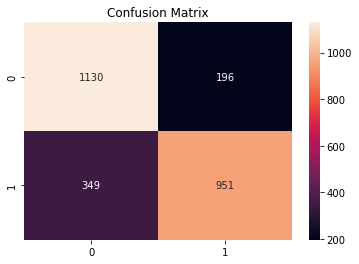

In [166]:
#Confusion matrix for Decision Tree model because the performance of model is good as compare to other model
cm=confusion_matrix(y_test1,dt_p2)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [167]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc=roc_auc_score(dt_p2,y_test1)
roc

0.7965745959268172

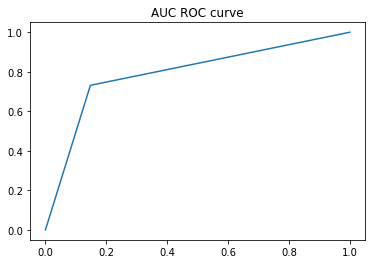

In [168]:
fpr,tpr,threshold=roc_curve(y_test1,dt_p2)
plt.plot(fpr,tpr)
plt.title("AUC ROC curve")
plt.show()

Conclusion : after Doining class imbalance and outlier treatment the accuracy of the model is inceases as compare to data Frame 1  The Accuracy and AUC are close to each other,in this case decision tree model is good fitted to the data .also True positive are the high as comapre to true negative so we can the result by using AUC- ROC curve.

# Base Model 3

In [169]:
#dt1.feature_importances_

In [170]:
#df=pd.DataFrame({"Feature_Score":list(dt.feature_importances_),"columns":list(data.iloc[:,:-1].columns)})
#df

In [171]:
#data3=data1.drop(["Warehouse_block","Mode_of_Shipment","Customer_care_calls","Customer_rating","Prior_purchases","Product_importance","Gender",],axis=1)
#data3

# Feature selection : Recursive Feature Elimination

In [172]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [173]:
rfe=RFE(dtree,n_features_to_select=6)

In [174]:
rfe.fit(data1.iloc[:,:-1],data1.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)

In [175]:
rfe.support_

array([ True, False, False,  True,  True,  True, False, False,  True,
        True])

In [176]:
f1=pd.DataFrame({"feature":list(rfe.support_),"col":list(data1.iloc[:,:-1].columns)})

In [177]:
f1

,feature,col
0,True,Warehouse_block
1,False,Mode_of_Shipment
2,False,Customer_care_calls
3,True,Customer_rating
4,True,Cost_of_the_Product
5,True,Prior_purchases
6,False,Product_importance
7,False,Gender
8,True,Discount_offered
9,True,Weight_in_gms


In [178]:
data3=data1.drop(["Mode_of_Shipment","Customer_care_calls","Prior_purchases","Product_importance","Gender",],axis=1)
data3

,Warehouse_block,Customer_rating,Cost_of_the_Product,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
8805,1,1,176,2.000000,75.670338,0
5990,0,2,153,2.449490,63.686733,0
9422,0,1,181,1.732051,32.218007,0
10377,1,3,165,1.414214,72.180330,0
9470,0,3,251,2.828427,65.161338,0
...,...,...,...,...,...,...
10985,4,1,229,3.162278,32.249031,1
10986,3,5,255,2.236068,38.183766,1
10987,4,3,242,3.162278,42.965102,1
10991,4,2,261,3.000000,35.028560,1


# 1)Logistic Regression

In [179]:
x2=data3.iloc[: ,0:-1]
y2=data3.iloc[:,-1]

In [180]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2,random_state=101)
x_train2.shape,x_test2.shape,y_train2.shape,y_test2.shape

((10500, 5), (2626, 5), (10500,), (2626,))

In [181]:
from sklearn.linear_model import LogisticRegression
lg2=LogisticRegression()

In [182]:
lg2.fit(x_train2,y_train2)

LogisticRegression()

In [183]:
lg_p3=lg2.predict(x_test2)

In [184]:

cf_3=confusion_matrix(lg_p3,y_test2)
cf_3

array([[944, 539],
       [382, 761]], dtype=int64)

In [185]:
lg_ac3=cf_3.diagonal().sum()/cf_3.sum()*100
lg_ac3

64.92764661081493

In [186]:
re_31=recall_score(y_test2,lg_p3)
pr_31=precision_score(y_test2,lg_p3)
f31=f1_score(y_test2,lg_p3,average="weighted")
print(classification_report(lg_p3,y_test2)) 

              precision    recall  f1-score   support

           0       0.71      0.64      0.67      1483
           1       0.59      0.67      0.62      1143

    accuracy                           0.65      2626
   macro avg       0.65      0.65      0.65      2626
weighted avg       0.66      0.65      0.65      2626



# Decision Tree

In [187]:
from sklearn.tree import DecisionTreeClassifier
dt3=DecisionTreeClassifier()
dt3.fit(x_train2,y_train2)

DecisionTreeClassifier()

In [188]:
dt_p3=dt3.predict(x_test2)
#dt_p3

In [189]:
dt_c3=confusion_matrix(dt_p3,y_test2)
dt_c3

array([[1127,  336],
       [ 199,  964]], dtype=int64)

In [190]:
dt_ac3=dt_c3.diagonal().sum()/dt_c3.sum()*100
dt_ac3

79.62680883472963

In [191]:
re_32=recall_score(y_test2,dt_p3)
pr_32=precision_score(y_test2,dt_p3)
f32=f1_score(y_test2,dt_p3,average="weighted")
print(classification_report(dt_p3,y_test1))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1463
           1       0.74      0.83      0.78      1163

    accuracy                           0.80      2626
   macro avg       0.80      0.80      0.80      2626
weighted avg       0.80      0.80      0.80      2626



# 3) Random Forest

In [192]:
from sklearn.ensemble import RandomForestClassifier
rf3=RandomForestClassifier()
rf3.fit(x_train2,y_train2)

RandomForestClassifier()

In [193]:
rf_p3=rf3.predict(x_test2)

In [194]:
rf_c3=confusion_matrix(rf_p3,y_test2)
rf_c3

array([[1172,  444],
       [ 154,  856]], dtype=int64)

In [195]:
rf_ac3=rf_c3.diagonal().sum()/rf_c3.sum()*100
rf_ac3

77.22772277227723

In [196]:
re_33=recall_score(y_test2,rf_p3)
pr_33=precision_score(y_test2,rf_p3)
f33=f1_score(y_test2,rf_p3,average="weighted")
print(classification_report(rf_p3,y_test1))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1616
           1       0.66      0.85      0.74      1010

    accuracy                           0.77      2626
   macro avg       0.77      0.79      0.77      2626
weighted avg       0.80      0.77      0.78      2626



# 4)K-Nearset Neighbors

In [197]:
from sklearn.neighbors import KNeighborsClassifier
knn3=KNeighborsClassifier()
knn3.fit(x_train2,y_train2)

KNeighborsClassifier()

In [198]:
knn_p3=knn3.predict(x_test2)

In [199]:
knn_c3=confusion_matrix(knn_p3,y_test2)
knn_c3

array([[1072,  499],
       [ 254,  801]], dtype=int64)

In [200]:
knn_ac3=knn_c3.diagonal().sum()/knn_c3.sum()*100
knn_ac3

71.32520944402133

In [201]:
re_34=recall_score(y_test2,knn_p3)
pr_34=precision_score(y_test2,knn_p3)
f34=f1_score(y_test2,knn_p3,average="weighted")
print(classification_report(knn_p3,y_test1))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      1571
           1       0.62      0.76      0.68      1055

    accuracy                           0.71      2626
   macro avg       0.71      0.72      0.71      2626
weighted avg       0.73      0.71      0.72      2626



# 5) XGB(XGBoost) 

In [202]:
import xgboost
from xgboost import XGBClassifier

In [203]:
xgb2=XGBClassifier()
xgb2.fit(x_train2,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [204]:
xgb_p3=xgb2.predict(x_test2)
#xgb_p3

In [205]:
xgb_c3=confusion_matrix(y_test2,xgb_p3)
xgb_c3

array([[1177,  149],
       [ 492,  808]], dtype=int64)

In [206]:
xgb_ac3=xgb_c3.diagonal().sum()/xgb_c3.sum()*100
xgb_ac3

75.59025133282559

In [207]:
re_35=recall_score(y_test2,xgb_p3)
pr_35=precision_score(y_test2,xgb_p3)
f35=f1_score(y_test2,xgb_p3,average="weighted")
print(classification_report(y_test2,xgb_p3))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79      1326
           1       0.84      0.62      0.72      1300

    accuracy                           0.76      2626
   macro avg       0.77      0.75      0.75      2626
weighted avg       0.77      0.76      0.75      2626



# 7)SUPPORT VECTOR MACHINE

In [208]:
from sklearn.svm import SVC
svm3=SVC()
svm3.fit(x_train2,y_train2)

SVC()

In [209]:
s_p3=svm3.predict(x_test2)

In [210]:
s_cf3=confusion_matrix(y_test2,s_p3)
s_cf3

array([[1089,  237],
       [ 618,  682]], dtype=int64)

In [211]:
s_ac3=s_cf3.diagonal().sum()/s_cf3.sum()*100
s_ac3

67.44097486671744

In [212]:
re_36=recall_score(y_test2,s_p3)
pr_36=precision_score(y_test2,s_p3)
f36=f1_score(y_test2,s_p3,average="weighted")
print(classification_report(s_p3,y_test2))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72      1707
           1       0.52      0.74      0.61       919

    accuracy                           0.67      2626
   macro avg       0.67      0.69      0.67      2626
weighted avg       0.72      0.67      0.68      2626



# 7)Naive Bayes

In [213]:
from sklearn.naive_bayes import MultinomialNB
nb3=MultinomialNB()

In [214]:
nb3.fit(x_train2,y_train2)

MultinomialNB()

In [215]:
nb_p3=nb3.predict(x_test2)

In [216]:
cf_n3=confusion_matrix(y_test2,nb_p3)
cf_n3

array([[937, 389],
       [481, 819]], dtype=int64)

In [217]:
nb_ac3=cf_n3.diagonal().sum()/cf_n3.sum()*100
nb_ac3

66.86976389946688

In [218]:
re_37=recall_score(y_test2,nb_p3)
pr_37=precision_score(y_test2,nb_p3)
f37=f1_score(y_test2,nb_p3,average="weighted")
print(classification_report(nb_p3,y_test2))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68      1418
           1       0.63      0.68      0.65      1208

    accuracy                           0.67      2626
   macro avg       0.67      0.67      0.67      2626
weighted avg       0.67      0.67      0.67      2626



In [219]:
Model3=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB(XGBoost)","SUPPORT VECTOR MACHINE","Naive Bayes"]
Accuracy3=[lg_ac3,dt_ac3,rf_ac3,knn_ac3,xgb_ac3,s_ac3,nb_ac3]
f1_score3=[f31,f32,f33,f34,f35,f36,f37]
recall3=[re_31,re_32,re_33,re_34,re_35,re_36,re_37]
precision3=[pr_31,pr_32,pr_33,pr_34,pr_35,pr_36,pr_37]

In [220]:
DataFrame3=pd.DataFrame({"Model":Model3,"Accuracy":Accuracy3,"f1-Score":f1_score3,"recall":recall3,"precision":precision3})  
DataFrame3

,Model,Accuracy,f1-Score,recall,precision
0,Logistic Regression,64.927647,0.647808,0.585385,0.665792
1,Decision Tree,79.626809,0.795606,0.741538,0.828891
2,Random Forest,77.227723,0.769207,0.658462,0.847525
3,KNN,71.325209,0.710462,0.616154,0.759242
4,XGB(XGBoost),75.590251,0.751332,0.621538,0.844305
5,SUPPORT VECTOR MACHINE,67.440975,0.666908,0.524615,0.742111
6,Naive Bayes,66.869764,0.668175,0.630000,0.677980


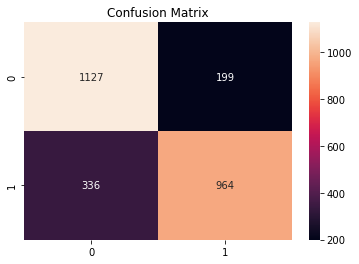

In [221]:
#Confusion matrix for Decision Tree model because the performance of model is good as compare to other model
cm=confusion_matrix(y_test2,dt_p3)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [222]:
roc=roc_auc_score(dt_p3,y_test2)
roc

0.7996128639428635

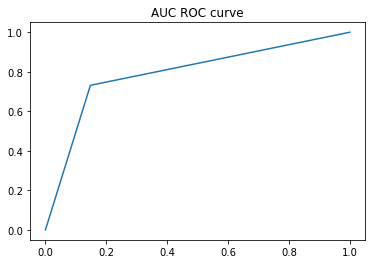

In [223]:
fpr1,tpr1,threshold=roc_curve(y_test1,dt_p2)
plt.plot(fpr1,tpr1)
plt.title("AUC ROC curve")
plt.show()

Conclusion:After Doing the feature selection the By comparing dataframe 2 and dataframe 3 performance of the model is not increases this means that feature selection does not any affect on the data in this case we can conclude that Decison tree is good fitted data.